In [1]:
print('設定Google網路硬碟，本地端不用這幾行語法')
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

設定Google網路硬碟，本地端不用這幾行語法
Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab第三階段202505/ch13_20250710/jena_climate_2009_2016.csv')
print(df.head())
print(df.shape)
print('查看是否有遺失值')
print(df.isnull().sum())
print('查看資料型態')
print(df.dtypes)
print('查看目前資料索引值')
print(df.index)

             Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0  01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
1  01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2  01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
3  01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
4  01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0          3.33          3.11          0.22       1.94             3.12   
1          3.23          3.02          0.21       1.89             3.03   
2          3.21          3.01          0.20       1.88             3.02   
3          3.26          3.07          0.19       1.92             3.08   
4          3.27          3.08          0.19       1.92             3.09   

   rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
0       1307.75      1.03        

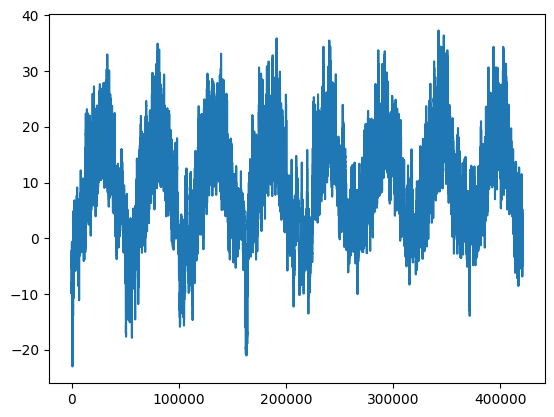

datatime設定為index
                     p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
Date Time                                                                
01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   

                     VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  \
Date Time                                                                  
01.01.2009 00:10:00          3.33          3.11          0.22       1.94   
01.01.2009 00:20:00          3.23          3.02          0.21       1.89   
01.01.2009 00:30:00          3.21          3.01          0.20       1.88   
01.01.2009 00:40:00          3.26          3.07          0.19       1.92   
01.01.20

In [3]:
import matplotlib.pyplot as plt
plt.plot(df['T (degC)'])
plt.show()

import numpy as np
print('datatime設定為index')
df1 = df.set_index('Date Time')
print(df1.head())
print(df1.shape)
print(df1.index)

In [4]:
df1.index = pd.to_datetime(df1.index, format='%d.%m.%Y %H:%M:%S')
print('因為原本資料的日期時間與dataFrame的日期時間格式不對，所以要做設定')
print('原本的01.01.2009 00:20:00')
print(df1.head())
print(df1.index)
df2 = df1.groupby(pd.Grouper(freq='120min')).mean()
print(df2.head())
print(df2.shape)

因為原本資料的日期時間與dataFrame的日期時間格式不對，所以要做設定
原本的01.01.2009 00:20:00
                     p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
Date Time                                                                
2009-01-01 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
2009-01-01 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2009-01-01 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
2009-01-01 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
2009-01-01 00:50:00    996.51     -8.27    265.15        -9.04    94.1   

                     VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  \
Date Time                                                                  
2009-01-01 00:10:00          3.33          3.11          0.22       1.94   
2009-01-01 00:20:00          3.23          3.02          0.21       1.89   
2009-01-01 00:30:00          3.21          3.01          0.20       1.88   
2009-01-01 00:40:00          3.26       

                        T
Date Time                
2009-01-01 00:10:00 -8.02
2009-01-01 00:20:00 -8.41
2009-01-01 00:30:00 -8.51
2009-01-01 00:40:00 -8.31
2009-01-01 00:50:00 -8.27
...                   ...
2016-12-31 23:20:00 -4.05
2016-12-31 23:30:00 -3.35
2016-12-31 23:40:00 -3.16
2016-12-31 23:50:00 -4.23
2017-01-01 00:00:00 -4.82

[420551 rows x 1 columns]
T    False
dtype: bool


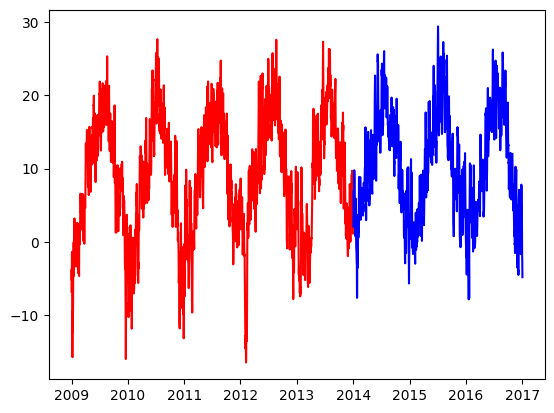

1826
1097


In [5]:
df5 = pd.DataFrame()
df5['T'] = df1['T (degC)']
print(df5)
print(df5.isnull().any())

# 以下資料是機器學習中的X，y得另外抓取
train1A = df5[df5.index < '2013-12-31 23:59:59']
test1A = df5[df5.index >= '2013-12-31 23:59:59']
train1B = train1A.resample('D').mean()
test1B = test1A.resample('D').mean()
plt.plot(train1B, c='r')
plt.plot(test1B, c='b')
plt.show()
print(len(train1B))
print(len(test1B))

In [6]:
list1 = []
list2 = []

for i in range(len(train1B['T'])):
  try:
    list1.append(float(train1B.iloc[i].values))
    list2.append(float(train1B.iloc[i + 1].values))
  except:
    pass

list1.pop(-1)
list3 = []
list4 = []

for i in range(len(test1B['T'])):
  try:
    list3.append(float(test1B.iloc[i].values))
    list4.append(float(test1B.iloc[i + 1].values))
  except:
    pass
list3.pop(-1)

-4.82

In [7]:
list5 = list1 + list3
list6 = list2 + list4
train1 = pd.DataFrame()
train1['X'] = list5
train1['y'] = list6
X = train1[['X']]
y = train1[['y']]
X.dropna(axis = 0, how='any', inplace = True)
y.dropna(axis = 0, how='any', inplace = True)
print('我們要將資料切割為訓練與測試')

from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.3)
print(x_train1.shape)
print(y_train1.shape)

/tmp/ipython-input-7-816486046.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(axis = 0, how='any', inplace = True)
/tmp/ipython-input-7-816486046.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.dropna(axis = 0, how='any', inplace = True)


我們要將資料切割為訓練與測試
(2043, 1)
(2043, 1)


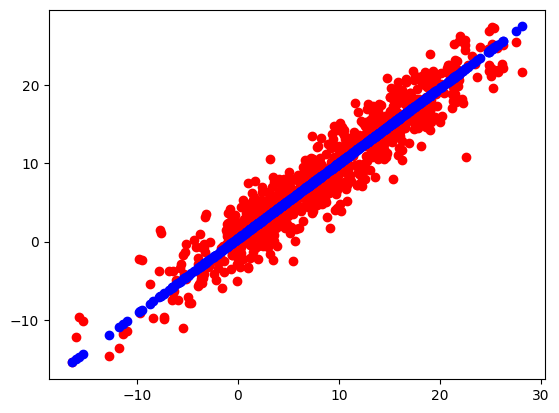

mse: 6.027033466079509
rmse: 2.45500172425184
平均絕對值誤差: 1.9276521024369702
中位絕對值誤差: 1.640597931588836
r2: 0.900679150717706


In [8]:
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()
model.fit(x_train1, y_train1)

import joblib
joblib.dump(model, 'model1A.pkl')
model1a = joblib.load('model1A.pkl')
predict = model1a.predict(x_test1)
plt.scatter(x_test1, y_test1, c='red')
plt.scatter(x_test1, predict, c='blue')
plt.show()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
print('mse:', mean_squared_error(y_test1, predict))
print('rmse:', np.sqrt(mean_squared_error(y_test1, predict)))
print('平均絕對值誤差:', mean_absolute_error(y_test1, predict))
print('中位絕對值誤差:', median_absolute_error(y_test1, predict))
print('r2:', r2_score(y_test1, predict))

1095
1095


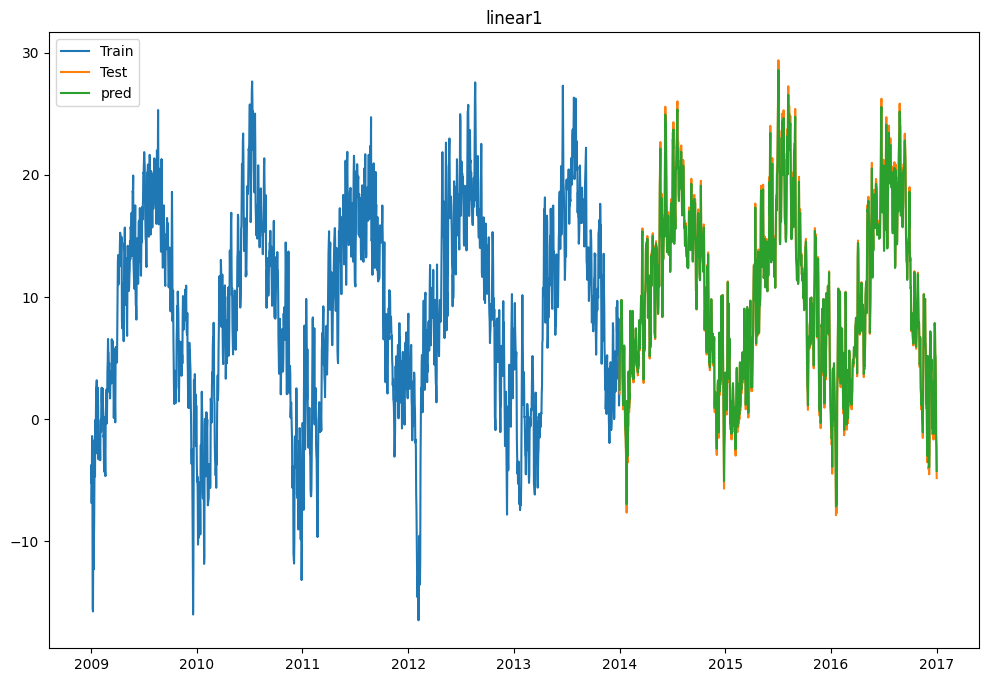

In [9]:
list7 = []
for i in range(len(test1B['T'])):
    list7.append(float(test1B.iloc[i].values))

trytopred = pd.DataFrame()
trytopred['X'] = list7
trytopred.dropna(axis = 0, how='any', inplace = True)
linear1 = test1B.copy()
linear1.dropna(axis = 0, how='any', inplace = True)
print(len(linear1))
print(len(trytopred))
y_pred = model1a.predict(trytopred)
linear1['pred'] = y_pred
plt.figure(figsize = (12,8))
plt.plot(train1B.index, train1B['T'], label='Train')
plt.plot(test1B.index, test1B['T'], label='Test')
plt.plot(linear1.index, linear1['pred'], label='pred')
plt.legend(loc='best')
plt.title("linear1")
plt.show()

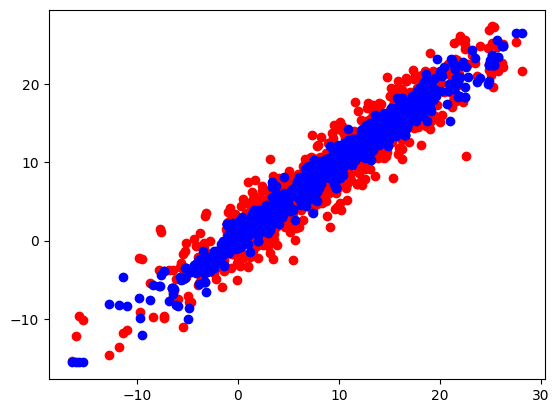

mse: 7.715497135518711
rmse: 2.7776783715035673
平均絕對值誤差: 2.1851194352006087
中位絕對值誤差: 1.8001388888888892
r2: 0.8728545755639718


In [10]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors = 3)
model.fit(x_train1, y_train1)

import joblib
joblib.dump(model, 'model1A.pkl')
model1a = joblib.load('model1A.pkl')
predict = model1a.predict(x_test1)
plt.scatter(x_test1, y_test1, c='red')
plt.scatter(x_test1, predict, c='blue')
plt.show()

import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
print('mse:', mean_squared_error(y_test1, predict))
print('rmse:', np.sqrt(mean_squared_error(y_test1, predict)))
print('平均絕對值誤差:', mean_absolute_error(y_test1, predict))
print('中位絕對值誤差:', median_absolute_error(y_test1, predict))
print('r2:', r2_score(y_test1, predict))

1095
1095


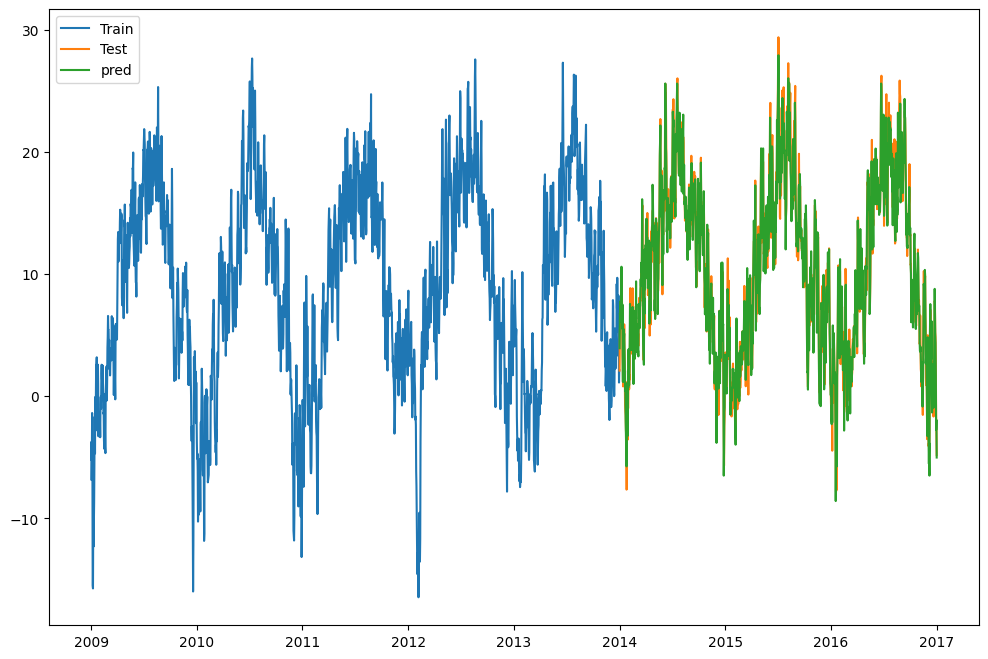

In [11]:
list7 = []
for i in range(len(test1B['T'])):
    list7.append(float(test1B.iloc[i].values))

trytopred = pd.DataFrame()
trytopred['X'] = list7
trytopred.dropna(axis = 0, how='any', inplace = True)
linear1 = test1B.copy()
linear1.dropna(axis = 0, how='any', inplace = True)
print(len(linear1))
print(len(trytopred))
y_pred = model1a.predict(trytopred)
linear1['pred'] = y_pred
plt.figure(figsize = (12,8))
plt.plot(train1B.index, train1B['T'], label='Train')
plt.plot(test1B.index, test1B['T'], label='Test')
plt.plot(linear1.index, linear1['pred'], label='pred')
plt.legend(loc='best')
plt.show()

(-0.9753836234744065,
 0.7621363564361012,
 0,
 12,
 {'1%': -4.137829282407408,
  '5%': -3.1549724074074077,
  '10%': -2.7144769444444443},
 31.2466098872313)

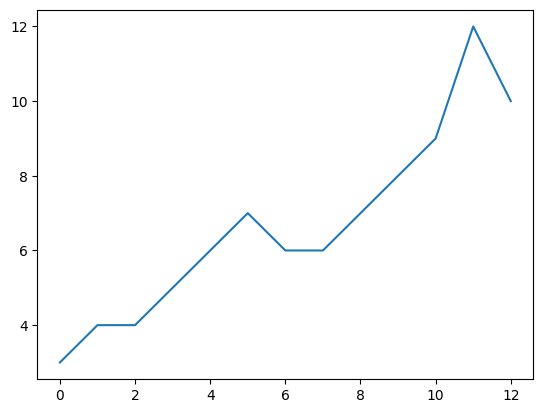

In [12]:
data = [3, 4, 4, 5, 6, 7, 6, 6, 7, 8, 9, 12, 10]

import matplotlib.pyplot as plt
plt.plot(data)

from statsmodels.tsa.stattools import adfuller  # perform augmented Dickey-Fuller test
adfuller(data)

In [13]:
!pip install numpy==1.24.4
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 27.0 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

best model:  ARIMA(4,0,2)(0,0,0)[0] intercept


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


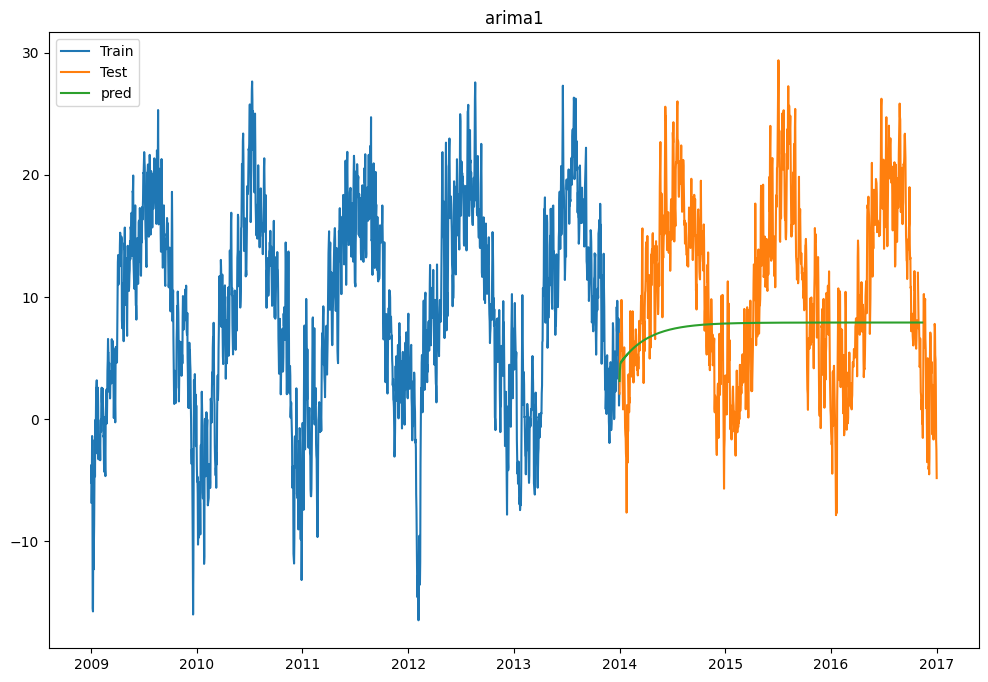

7.645


In [14]:
import pmdarima as pm
model = pm.auto_arima(train1B)
print('best model:', model)
n_periods = 1047
y_pred = model.predict(n_periods)
arima1 = test1B.copy()
arima1['pred'] = y_pred
plt.figure(figsize = (12,8))
plt.plot(train1B.index, train1B['T'], label='Train')
plt.plot(test1B.index, test1B['T'], label='Test')
plt.plot(arima1.index, arima1['pred'], label='pred')
plt.legend(loc='best')
plt.title("arima1")
plt.show()

from sklearn.metrics import mean_squared_error
from math import sqrt
arima1.dropna(axis = 0, how='any', inplace = True)
rmse = np.sqrt(mean_squared_error(arima1['T'], arima1['pred']))
rmse = round(rmse, 3)
print(rmse)